In [1]:
# Adding google drive to colab/
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Importing all preprocessing libraries
import os
import cv2
from sklearn.utils import shuffle
import numpy as np

In [ ]:
labels =["Apple Scab Leaf",
"Soyabean leaf",
"Apple leaf",
"Squash Powdery mildew leaf",
"Apple rust leaf",
"Strawberry leaf",
"Bell_pepper leaf",
"Tomato Early blight leaf",
"Bell_pepper leaf spot",
"Tomato Septoria leaf spot",
"Blueberry leaf",
"Tomato leaf",
"Cherry leaf",
"Tomato leaf bacterial spot",
"Corn Gray leaf spot",
"Tomato leaf late blight",
"Corn leaf blight",
"Tomato leaf mosaic virus",
"Corn rust leaf",
"Tomato leaf yellow virus",
"Peach leaf",
"Tomato mold leaf",
"Potato leaf early blight",
"Tomato two spotted spider mites leaf",
"Potato leaf late blight",
"grape leaf",
"Raspberry leaf",
"grape leaf black rot"]

In [2]:
labels_names = ['Apple Scab Leaf', 'Apple leaf', 'Squash Powdery mildew leaf', 'Apple rust leaf',
                'Strawberry leaf', 'Tomato Early blight leaf', 'Tomato Septoria leaf spot',
                'Blueberry leaf', 'Tomato leaf bacterial spot', 'Tomato leaf late blight',
                'Corn leaf blight', 'Corn rust leaf', 'Peach leaf', 'Tomato mold leaf',
                'Potato leaf early blight', 'Potato leaf late blight', 'Raspberry leaf']

In [ ]:
def get_classIndex(class_name):
  return labels_names.index(class_name)

In [ ]:
# Loading image dataset into a data strucutre.
def load_img(directory):
  Images = []
  Labels = []
  for labels in os.listdir(directory):
    if labels == '.DS_Store':
      continue
    if labels not in labels_names:
      continue
    filenames = [f for f in os.listdir(directory+labels)
       if os.path.isfile(os.path.join(directory+labels, f))]
    for image_file in filenames:
      image = cv2.imread(directory+labels+'/'+image_file)
      image = cv2.resize(image, (416,416))
      image = np.array(image).astype('float32')/255.0
      label = np.array(get_classIndex(labels)).astype('uint')
      Images.append(image)
      Labels.append(get_classIndex(labels))
  return shuffle(Images, Labels, random_state = 40)

In [ ]:
# To run only once if required
# For training dataset
Img_data, Label_data = load_img('/content/gdrive/MyDrive/EE267/Dataset_Classification/train/')
Img_np = np.array(Img_data)
Label_np = np.array(Label_data)
print(Img_np.shape)
print(Label_np.shape)

(1769, 416, 416, 3)
(1769,)


In [ ]:
# save raw data as numpy array for faster load in future
!mkdir -p "/content/gdrive/MyDrive/PlantDoc/dataset_numpy_norm_less"
np.save('/content/gdrive/MyDrive/PlantDoc/dataset_numpy_norm_less/Images_train.npy',Img_np)
np.save ('/content/gdrive/MyDrive/PlantDoc/dataset_numpy_norm_less/Labels_train.npy',Label_np)

In [ ]:
# To run only once if required
# For testing dataset
Img_data, Label_data = load_img('/content/gdrive/MyDrive/EE267/Dataset_Classification/test/')
Img_np = np.array(Img_data)
Label_np = np.array(Label_data)
print(Img_np.shape)
print(Label_np.shape)

(153, 416, 416, 3)
(153,)


In [ ]:
# save raw data as numpy array for faster load in future
!mkdir -p "/content/gdrive/MyDrive/PlantDoc/dataset_numpy_norm_less"
np.save('/content/gdrive/MyDrive/PlantDoc/dataset_numpy_norm_less/Images_test.npy',Img_np)
np.save ('/content/gdrive/MyDrive/PlantDoc/dataset_numpy_norm_less/Labels_test.npy',Label_np)

In [ ]:
Img_data = []
Label_data = []

In [ ]:

# new_labels = []
# for key in distribution.keys():
#   if distribution[key] > 75:
#     new_labels.append(get_classlabel(key))
# print(new_labels)

To Start exceultion after images are saved in .npy

In [ ]:
# Addin/g google drive to colab
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [13]:
# Importing all preprocessing libraries
import os
import numpy as np

In [14]:
labels_names = ['Apple Scab Leaf', 'Apple leaf', 'Squash Powdery mildew leaf', 'Apple rust leaf', 'Strawberry leaf', 'Tomato Early blight leaf', 'Tomato Septoria leaf spot', 'Blueberry leaf', 'Tomato leaf bacterial spot', 'Tomato leaf late blight', 'Corn leaf blight', 'Corn rust leaf', 'Peach leaf', 'Tomato mold leaf', 'Potato leaf early blight', 'Potato leaf late blight', 'Raspberry leaf']

In [15]:
# Using saved numpy data for faster training
loaded_images = np.load('/content/gdrive/MyDrive/PlantDoc/dataset_numpy_norm_less/Images_train.npy')
loaded_labels = np.load('/content/gdrive/MyDrive/PlantDoc/dataset_numpy_norm_less/Labels_train.npy')

In [16]:
# Function to get class labels
def get_classlabel(class_code):
  return labels_names[class_code]

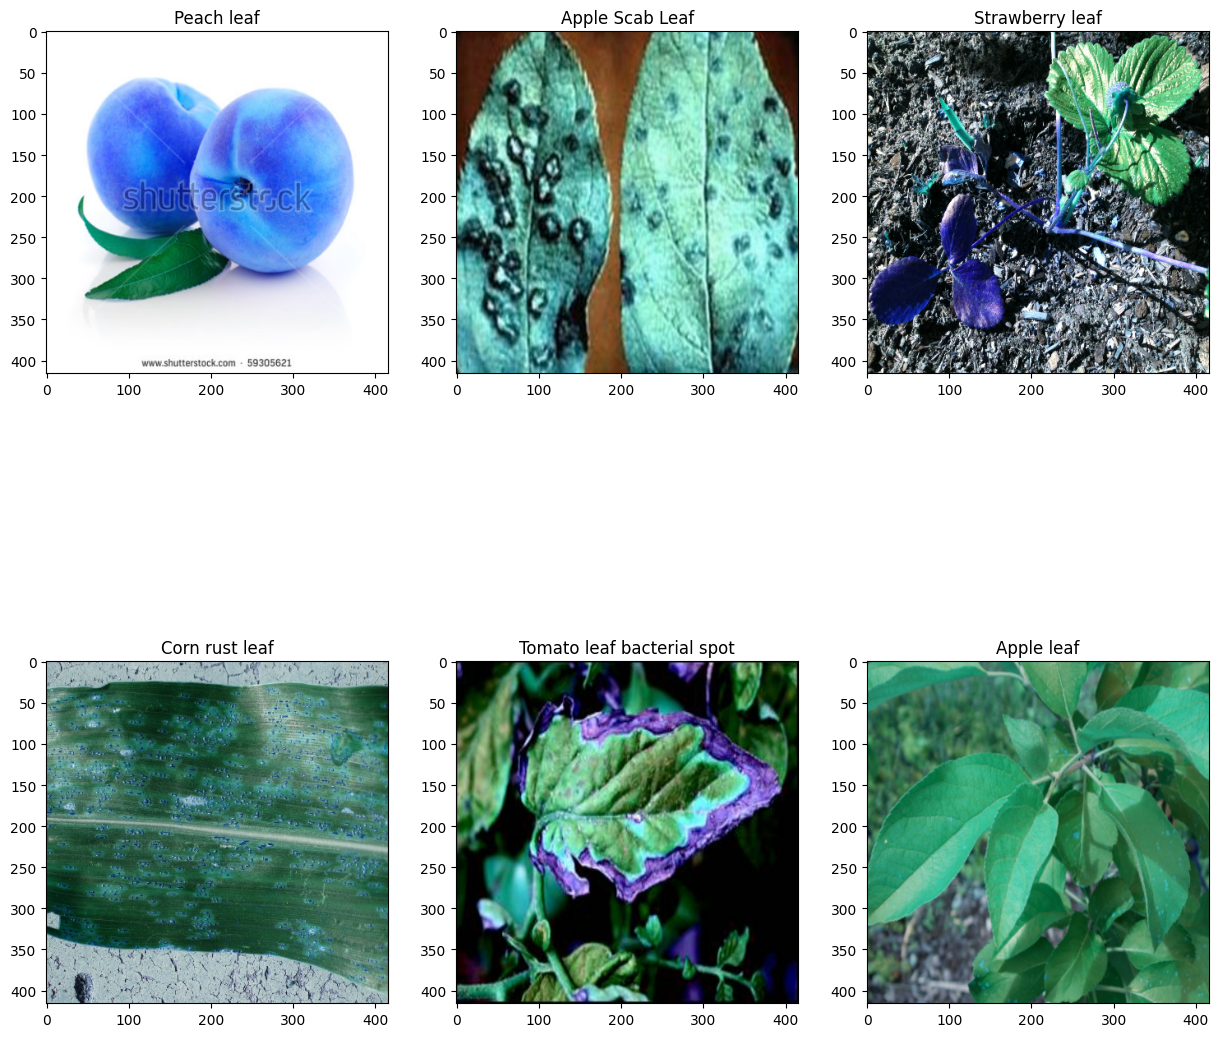

In [17]:
# Displaying few random images for visualization
from random import randint
import matplotlib.pyplot as plt
(fig, ax) = plt.subplots(2, 3, figsize=(15, 15))
ax = ax.ravel()
for a in ax:
  rnd_number = randint(0,len(loaded_labels))
  a.imshow(loaded_images[rnd_number])
  a.set_title(get_classlabel(loaded_labels[rnd_number]))

{0: 83, 1: 82, 2: 124, 3: 78, 4: 88, 5: 79, 6: 140, 7: 104, 8: 101, 9: 101, 10: 179, 11: 106, 12: 102, 13: 85, 14: 108, 15: 97, 16: 112}
(1769, 416, 416, 3)
(1769,)


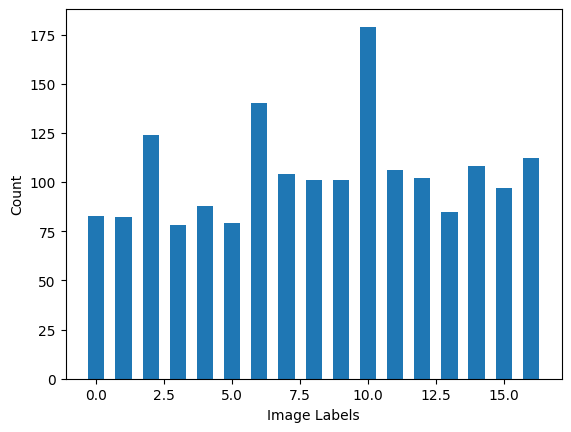

In [18]:
# Graph to show distribution of images with respect to each label
label_values, count = np.unique(loaded_labels,return_counts = True)
distribution = dict(zip(label_values, count))
plt.bar(list(distribution.keys()), distribution.values(),width = 0.6)
plt.xlabel('Image Labels')
plt.ylabel('Count')
plt.show
print(distribution)
print(loaded_images.shape)
print(loaded_labels.shape)

Text(0.5, 1.0, 'Blueberry leaf')

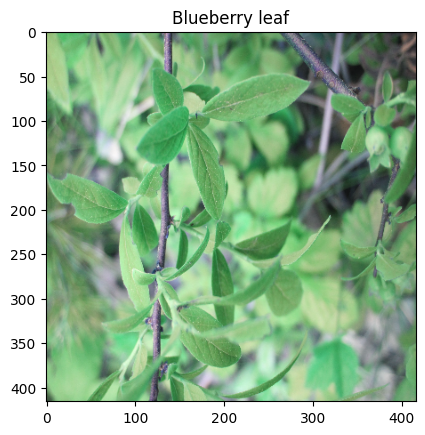

In [19]:
# Displaying random image label
rnd_number = randint(0,len(loaded_labels))
plt.imshow(loaded_images[rnd_number])
plt.title(get_classlabel(loaded_labels[rnd_number]))

In [20]:
from random import randint
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_val, y_train, y_val = train_test_split(loaded_images, loaded_labels, test_size = 1/8, random_state = 42 )

In [22]:
loaded_images = []
loaded_labels = []

In [23]:
from glob import glob # FILE OPERATIONS
import itertools
import math

In [24]:
# Applying Gaussian Blur to denoise the images
import cv2
for i in range(len(X_train)):
  X_train[i] =  cv2.GaussianBlur(X_train[i], ksize =(5,5),sigmaX =  0)
for i in range(len(X_val)):
  X_val[i] =  cv2.GaussianBlur(X_val[i], ksize =(5,5),sigmaX =  0)

Text(0.5, 1.0, 'Apple leaf')

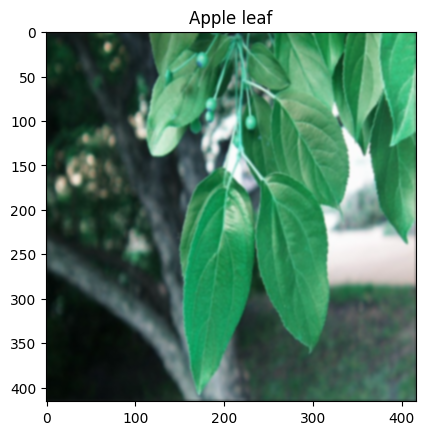

In [27]:
rnd_number = randint(0,len(X_train))
plt.imshow(X_train[rnd_number])
plt.title(get_classlabel(y_train[rnd_number]))

In [ ]:
# Displaying dataset size
print(X_train.shape, X_val.shape)
print(y_train.shape, y_val.shape)

(1547, 416, 416, 3) (222, 416, 416, 3)
(1547,) (222,)


Saving the data for future use

In [ ]:
# save raw data as numpy array for faster load in future
!mkdir -p "/content/gdrive/MyDrive/PlantDoc/dataset"
np.save('/content/gdrive/MyDrive/PlantDoc/dataset/Images_train.npy',X_train)
np.save ('/content/gdrive/MyDrive/PlantDoc/dataset/Labels_train.npy',y_train)

In [ ]:
# save raw data as numpy array for faster load in future
!mkdir -p "/content/gdrive/MyDrive/PlantDoc/dataset"
np.save('/content/gdrive/MyDrive/PlantDoc/dataset/Images_val.npy',X_val)
np.save ('/content/gdrive/MyDrive/PlantDoc/dataset/Labels_val.npy',y_val)

Start running on Models

In [ ]:
# Using saved numpy data for faster training
X_train = np.load('/content/gdrive/MyDrive/PlantDoc/dataset/Images_train.npy')
y_train = np.load('/content/gdrive/MyDrive/PlantDoc/dataset/Labels_train.npy')

In [ ]:
# Using saved numpy data for faster validation
X_val = np.load('/content/gdrive/MyDrive/PlantDoc/dataset/Images_val.npy')
y_val = np.load('/content/gdrive/MyDrive/PlantDoc/dataset/Labels_val.npy')

In [ ]:
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from keras.layers import Activation, Dense
from keras.models import Sequential
from keras.layers import Dropout, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model

In [ ]:
# Create an ImageDataGenerator instance with augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=20,      # Random rotation up to 20 degrees
    width_shift_range=0.2,  # Random horizontal shift
    height_shift_range=0.2, # Random vertical shift
    shear_range=0.2,        # Shear transformation
    zoom_range=0.2,         # Random zoom
    horizontal_flip=True,   # Random horizontal flip
    fill_mode='nearest'     # Fill mode for points outside the input boundaries
)

In [ ]:
input_shape = (416,416,3)
epoch = 25
batch_size = 8
no_classes = len(labels_names)

In [ ]:
from tensorflow.keras.applications import ResNet50
model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)

94765736/94765736 [==============================] - 1s 0us/step


In [ ]:
# # flatten the max-pooling output of Model
flatten = model.output
flatten = Flatten()(flatten)

In [ ]:
# # construct a fully-connected
# # layer header to predict the class label

softmaxHead = Dense(512, activation="relu")(flatten)
softmaxHead = Dropout(0.5)(softmaxHead)
softmaxHead = Dense(no_classes, activation="softmax", name="class_label")(softmaxHead)

In [ ]:
model = Model(
    inputs=model.input,
    outputs=softmaxHead)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
# Define a ModelCheckpoint callback
checkpoint_path = "/content/gdrive/MyDrive/PlantDoc/dataset/RA_CNN_RESNet_25/model_checkpoint_epoch_{epoch:02d}.h5"  # Include the epoch number in the filename
checkpoint_callback = ModelCheckpoint(
    checkpoint_path,
    save_best_only=True,  # Only best model is saved
    verbose=1
)


In [ ]:
opt = Adam(1e-4)
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=["accuracy"],
              loss_weights=1.0,
              run_eagerly=True)

In [ ]:
# Displaying dataset size
print(X_train.shape, X_val.shape)
print(y_train.shape, y_val.shape)

(1547, 416, 416, 3) (222, 416, 416, 3)
(1547,) (222,)


In [ ]:
# Fitting the model with the dataset
model.fit(datagen.flow(X_train, y_train, batch_size = batch_size),
          batch_size=batch_size,
          epochs = epoch,
          validation_data=(X_val,y_val),
          callbacks=[checkpoint_callback])

Epoch 1/25


194/194 [==============================] - ETA: 0s - loss: 4.8982 - accuracy: 0.2379
Epoch 1: val_loss improved from inf to 3.24947, saving model to /content/gdrive/MyDrive/PlantDoc/dataset/RA_CNN_RESNet_25/model_checkpoint_epoch_01.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


194/194 [==============================] - 192s 803ms/step - loss: 4.8982 - accuracy: 0.2379 - val_loss: 3.2495 - val_accuracy: 0.0676
Epoch 2/25
194/194 [==============================] - ETA: 0s - loss: 1.9653 - accuracy: 0.3756
Epoch 2: val_loss improved from 3.24947 to 3.14543, saving model to /content/gdrive/MyDrive/PlantDoc/dataset/RA_CNN_RESNet_25/model_checkpoint_epoch_02.h5
194/194 [==============================] - 199s 1s/step - loss: 1.9653 - accuracy: 0.3756 - val_loss: 3.1454 - val_accuracy: 0.1126
Epoch 3/25
194/194 [==============================] - ETA: 0s - loss: 1.6674 - accuracy: 0.4686
Epoch 3: val_loss improved from 3.14543 to 2.56694, saving model to /content/gdrive/MyDrive/PlantDoc/dataset/RA_CNN_RESNet_25/model_checkpoint_epoch_03.h5
194/194 [==============================] - 268s 1s/step - loss: 1.6674 - accuracy: 0.4686 - val_loss: 2.5669 - val_accuracy: 0.1937
Epoch 4/25
194/194 [==============================] - ETA: 0s - loss: 1.4429 - accuracy: 0.5553
Epo

In [ ]:
# Saving the model for future use
!mkdir -p saved_model
model.save('/content/gdrive/MyDrive/PlantDoc/dataset/RA_CNN_RESNet_25')

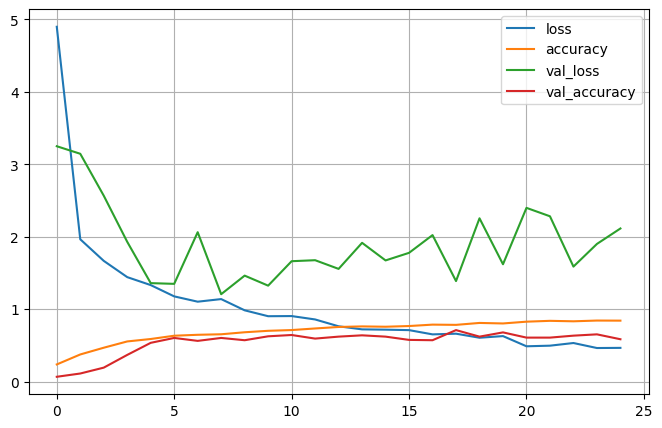

In [ ]:
# History graph of the model trained
import pandas as pd
pd.DataFrame(model.history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.show()

In [2]:
import tensorflow as tf
trained_model = tf.keras.models.load_model('/content/gdrive/MyDrive/PlantDoc/dataset/RA_CNN_RESNet_25')
trained_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 416, 416, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 422, 422, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 208, 208, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 208, 208, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                          

In [3]:
import numpy as np
# Using saved numpy data for faster testing
test_images = np.load('/content/gdrive/MyDrive/PlantDoc/dataset_numpy_norm_less/Images_test.npy')
test_labels = np.load('/content/gdrive/MyDrive/PlantDoc/dataset_numpy_norm_less/Labels_test.npy')

In [6]:
# Validating accuracy for test data
loss, acc = trained_model.evaluate(test_images,test_labels, verbose = 1)
print('Accuracy: %.3f'%acc)

5/5 [==============================] - 16s 812ms/step - loss: 2.6355 - accuracy: 0.5948
Accuracy: 0.595


In [3]:
import matplotlib.pyplot as plt
import itertools
def plot_confusion_matrix(cm, classes,title='Confusion matrix'):
    plt.figure(figsize=(20,20))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)


    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

In [4]:
# Classification report and Confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
y_proba = trained_model.predict(test_images)
y_pred = np.argmax(y_proba, axis = 1)

5/5 [==============================] - 17s 806ms/step


Confusion Matrix


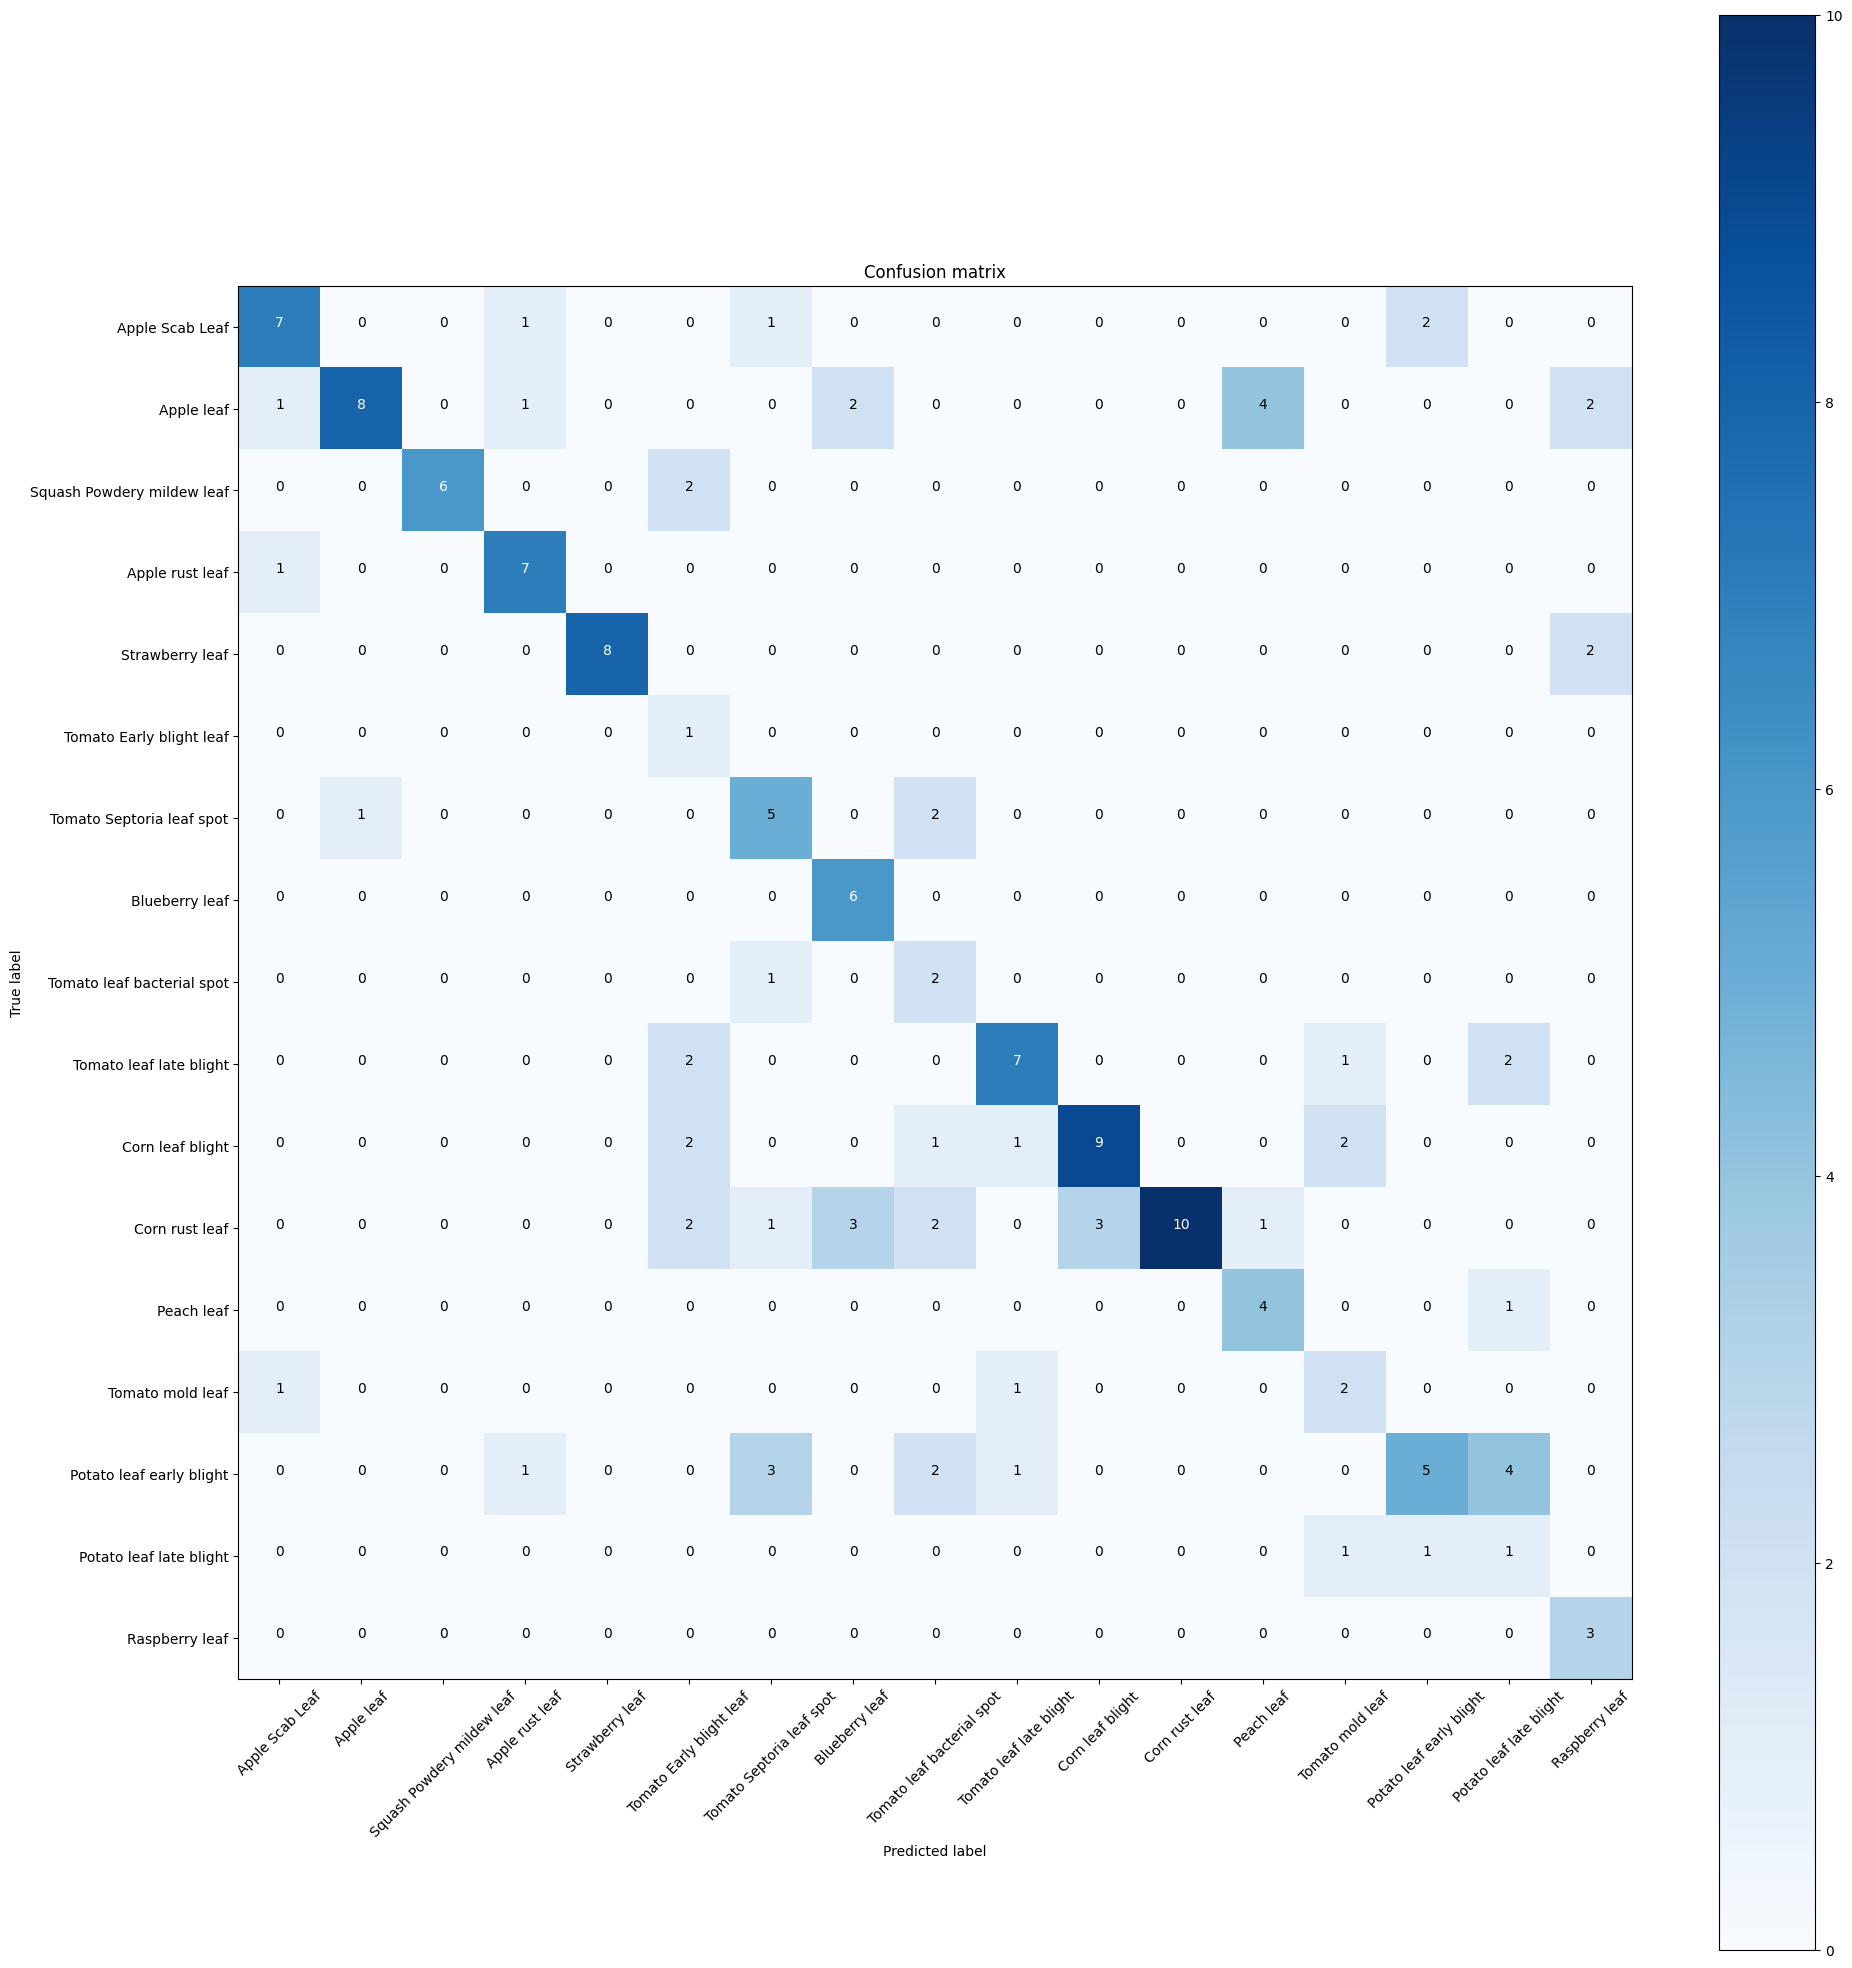

None


In [22]:
print('Confusion Matrix')
print(plot_confusion_matrix(confusion_matrix(y_pred, test_labels),labels_names))

In [5]:
print('Classification Report')
print(classification_report(y_pred, test_labels))

Classification Report
              precision    recall  f1-score   support

           0       0.70      0.64      0.67        11
           1       0.89      0.44      0.59        18
           2       1.00      0.75      0.86         8
           3       0.70      0.88      0.78         8
           4       1.00      0.80      0.89        10
           5       0.11      1.00      0.20         1
           6       0.45      0.62      0.53         8
           7       0.55      1.00      0.71         6
           8       0.22      0.67      0.33         3
           9       0.70      0.58      0.64        12
          10       0.75      0.60      0.67        15
          11       1.00      0.45      0.62        22
          12       0.44      0.80      0.57         5
          13       0.33      0.50      0.40         4
          14       0.62      0.31      0.42        16
          15       0.12      0.33      0.18         3
          16       0.43      1.00      0.60         3

    

## Inception Model

In [1]:
# Adding google drive to colab/
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
import numpy as np

In [3]:
# Using saved numpy data for faster training
X_train = np.load('/content/gdrive/MyDrive/PlantDoc/dataset/Images_train.npy')
y_train = np.load('/content/gdrive/MyDrive/PlantDoc/dataset/Labels_train.npy')

In [4]:
# Using saved numpy data for faster validation
X_val = np.load('/content/gdrive/MyDrive/PlantDoc/dataset/Images_val.npy')
y_val = np.load('/content/gdrive/MyDrive/PlantDoc/dataset/Labels_val.npy')

In [5]:
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from keras.layers import Activation, Dense
from keras.models import Sequential
from keras.layers import Dropout, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model

In [6]:
labels_names = ['Apple Scab Leaf', 'Apple leaf', 'Squash Powdery mildew leaf', 'Apple rust leaf', 'Strawberry leaf', 'Tomato Early blight leaf', 'Tomato Septoria leaf spot', 'Blueberry leaf', 'Tomato leaf bacterial spot', 'Tomato leaf late blight', 'Corn leaf blight', 'Corn rust leaf', 'Peach leaf', 'Tomato mold leaf', 'Potato leaf early blight', 'Potato leaf late blight', 'Raspberry leaf']

In [7]:
input_shape = (416,416,3)
epoch = 20
batch_size = 8
no_classes = len(labels_names)

In [8]:
# Create an ImageDataGenerator instance with augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=20,      # Random rotation up to 20 degrees
    width_shift_range=0.2,  # Random horizontal shift
    height_shift_range=0.2, # Random vertical shift
    shear_range=0.2,        # Shear transformation
    zoom_range=0.2,         # Random zoom
    horizontal_flip=True,   # Random horizontal flip
    fill_mode='nearest'     # Fill mode for points outside the input boundaries
)

In [9]:
from tensorflow.keras.callbacks import ModelCheckpoint
# Define a ModelCheckpoint callback
checkpoint_path = "/content/gdrive/MyDrive/PlantDoc/dataset/RA_Inception_20/model_checkpoint_epoch_{epoch:02d}.h5"  # Include the epoch number in the filename
checkpoint_callback = ModelCheckpoint(
    checkpoint_path,
    save_best_only=True,  # Only best model is saved
    verbose=1
)


In [10]:
from tensorflow.keras.applications import InceptionV3
model = InceptionV3(weights='imagenet', include_top=False, input_shape=input_shape)

87910968/87910968 [==============================] - 5s 0us/step


In [11]:
flatten = model.output
flatten = Flatten()(flatten)

In [12]:
softmaxHead = Dense(512, activation="relu")(flatten)
softmaxHead = Dropout(0.5)(softmaxHead)
softmaxHead = Dense(no_classes, activation="softmax", name="class_label")(softmaxHead)

In [13]:
model = Model(
    inputs=model.input,
    outputs=softmaxHead)

In [14]:
opt = Adam(1e-4)
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=["accuracy"],
              loss_weights=1.0,
              run_eagerly=True)

In [15]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 416, 416, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 207, 207, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 207, 207, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 207, 207, 32)         0         ['batch_normalization[0][0

In [16]:
# Fitting the model with the dataset
model.fit(datagen.flow(X_train, y_train, batch_size = batch_size),
          batch_size=batch_size,
          epochs = epoch,
          validation_data=(X_val,y_val),
          callbacks=[checkpoint_callback])

Epoch 1/20


194/194 [==============================] - ETA: 0s - loss: 3.7406 - accuracy: 0.1028
Epoch 1: val_loss improved from inf to 2.70622, saving model to /content/gdrive/MyDrive/PlantDoc/dataset/RA_Inception_20/model_checkpoint_epoch_01.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


194/194 [==============================] - 216s 942ms/step - loss: 3.7406 - accuracy: 0.1028 - val_loss: 2.7062 - val_accuracy: 0.1351
Epoch 2/20
194/194 [==============================] - ETA: 0s - loss: 2.6279 - accuracy: 0.1551
Epoch 2: val_loss improved from 2.70622 to 2.35785, saving model to /content/gdrive/MyDrive/PlantDoc/dataset/RA_Inception_20/model_checkpoint_epoch_02.h5
194/194 [==============================] - 182s 940ms/step - loss: 2.6279 - accuracy: 0.1551 - val_loss: 2.3579 - val_accuracy: 0.2072
Epoch 3/20
194/194 [==============================] - ETA: 0s - loss: 2.4016 - accuracy: 0.2392
Epoch 3: val_loss improved from 2.35785 to 2.03839, saving model to /content/gdrive/MyDrive/PlantDoc/dataset/RA_Inception_20/model_checkpoint_epoch_03.h5
194/194 [==============================] - 180s 927ms/step - loss: 2.4016 - accuracy: 0.2392 - val_loss: 2.0384 - val_accuracy: 0.3288
Epoch 4/20
194/194 [==============================] - ETA: 0s - loss: 2.0705 - accuracy: 0.3394

In [17]:
# Saving the model for future use
!mkdir -p saved_model
model.save('/content/gdrive/MyDrive/PlantDoc/dataset/RA_Inception_20')

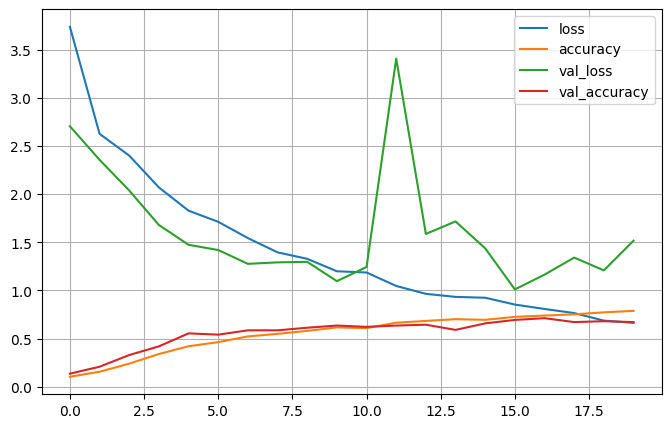

In [18]:
# History graph of the model trained
import matplotlib.pyplot as plt
import pandas as pd
pd.DataFrame(model.history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.show()

In [23]:
import tensorflow as tf
trained_model = tf.keras.models.load_model('/content/gdrive/MyDrive/PlantDoc/dataset/RA_Inception_15')
trained_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 416, 416, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 207, 207, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 207, 207, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 207, 207, 32)         0         ['batch_normalization[0][0

In [2]:
import numpy as np
# Using saved numpy data for faster training
test_images = np.load('/content/gdrive/MyDrive/PlantDoc/dataset_numpy_norm_less/Images_test.npy')
test_labels = np.load('/content/gdrive/MyDrive/PlantDoc/dataset_numpy_norm_less/Labels_test.npy')

In [24]:
# Validating accuracy for test data
loss, acc = trained_model.evaluate(test_images,test_labels, verbose = 1)
print('Accuracy: %.3f'%acc)

5/5 [==============================] - 9s 925ms/step - loss: 1.4615 - accuracy: 0.6144
Accuracy: 0.614


In [25]:
# Classification report and Confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
y_proba = trained_model.predict(test_images)
y_pred = np.argmax(y_proba, axis = 1)

5/5 [==============================] - 2s 215ms/step


Confusion Matrix


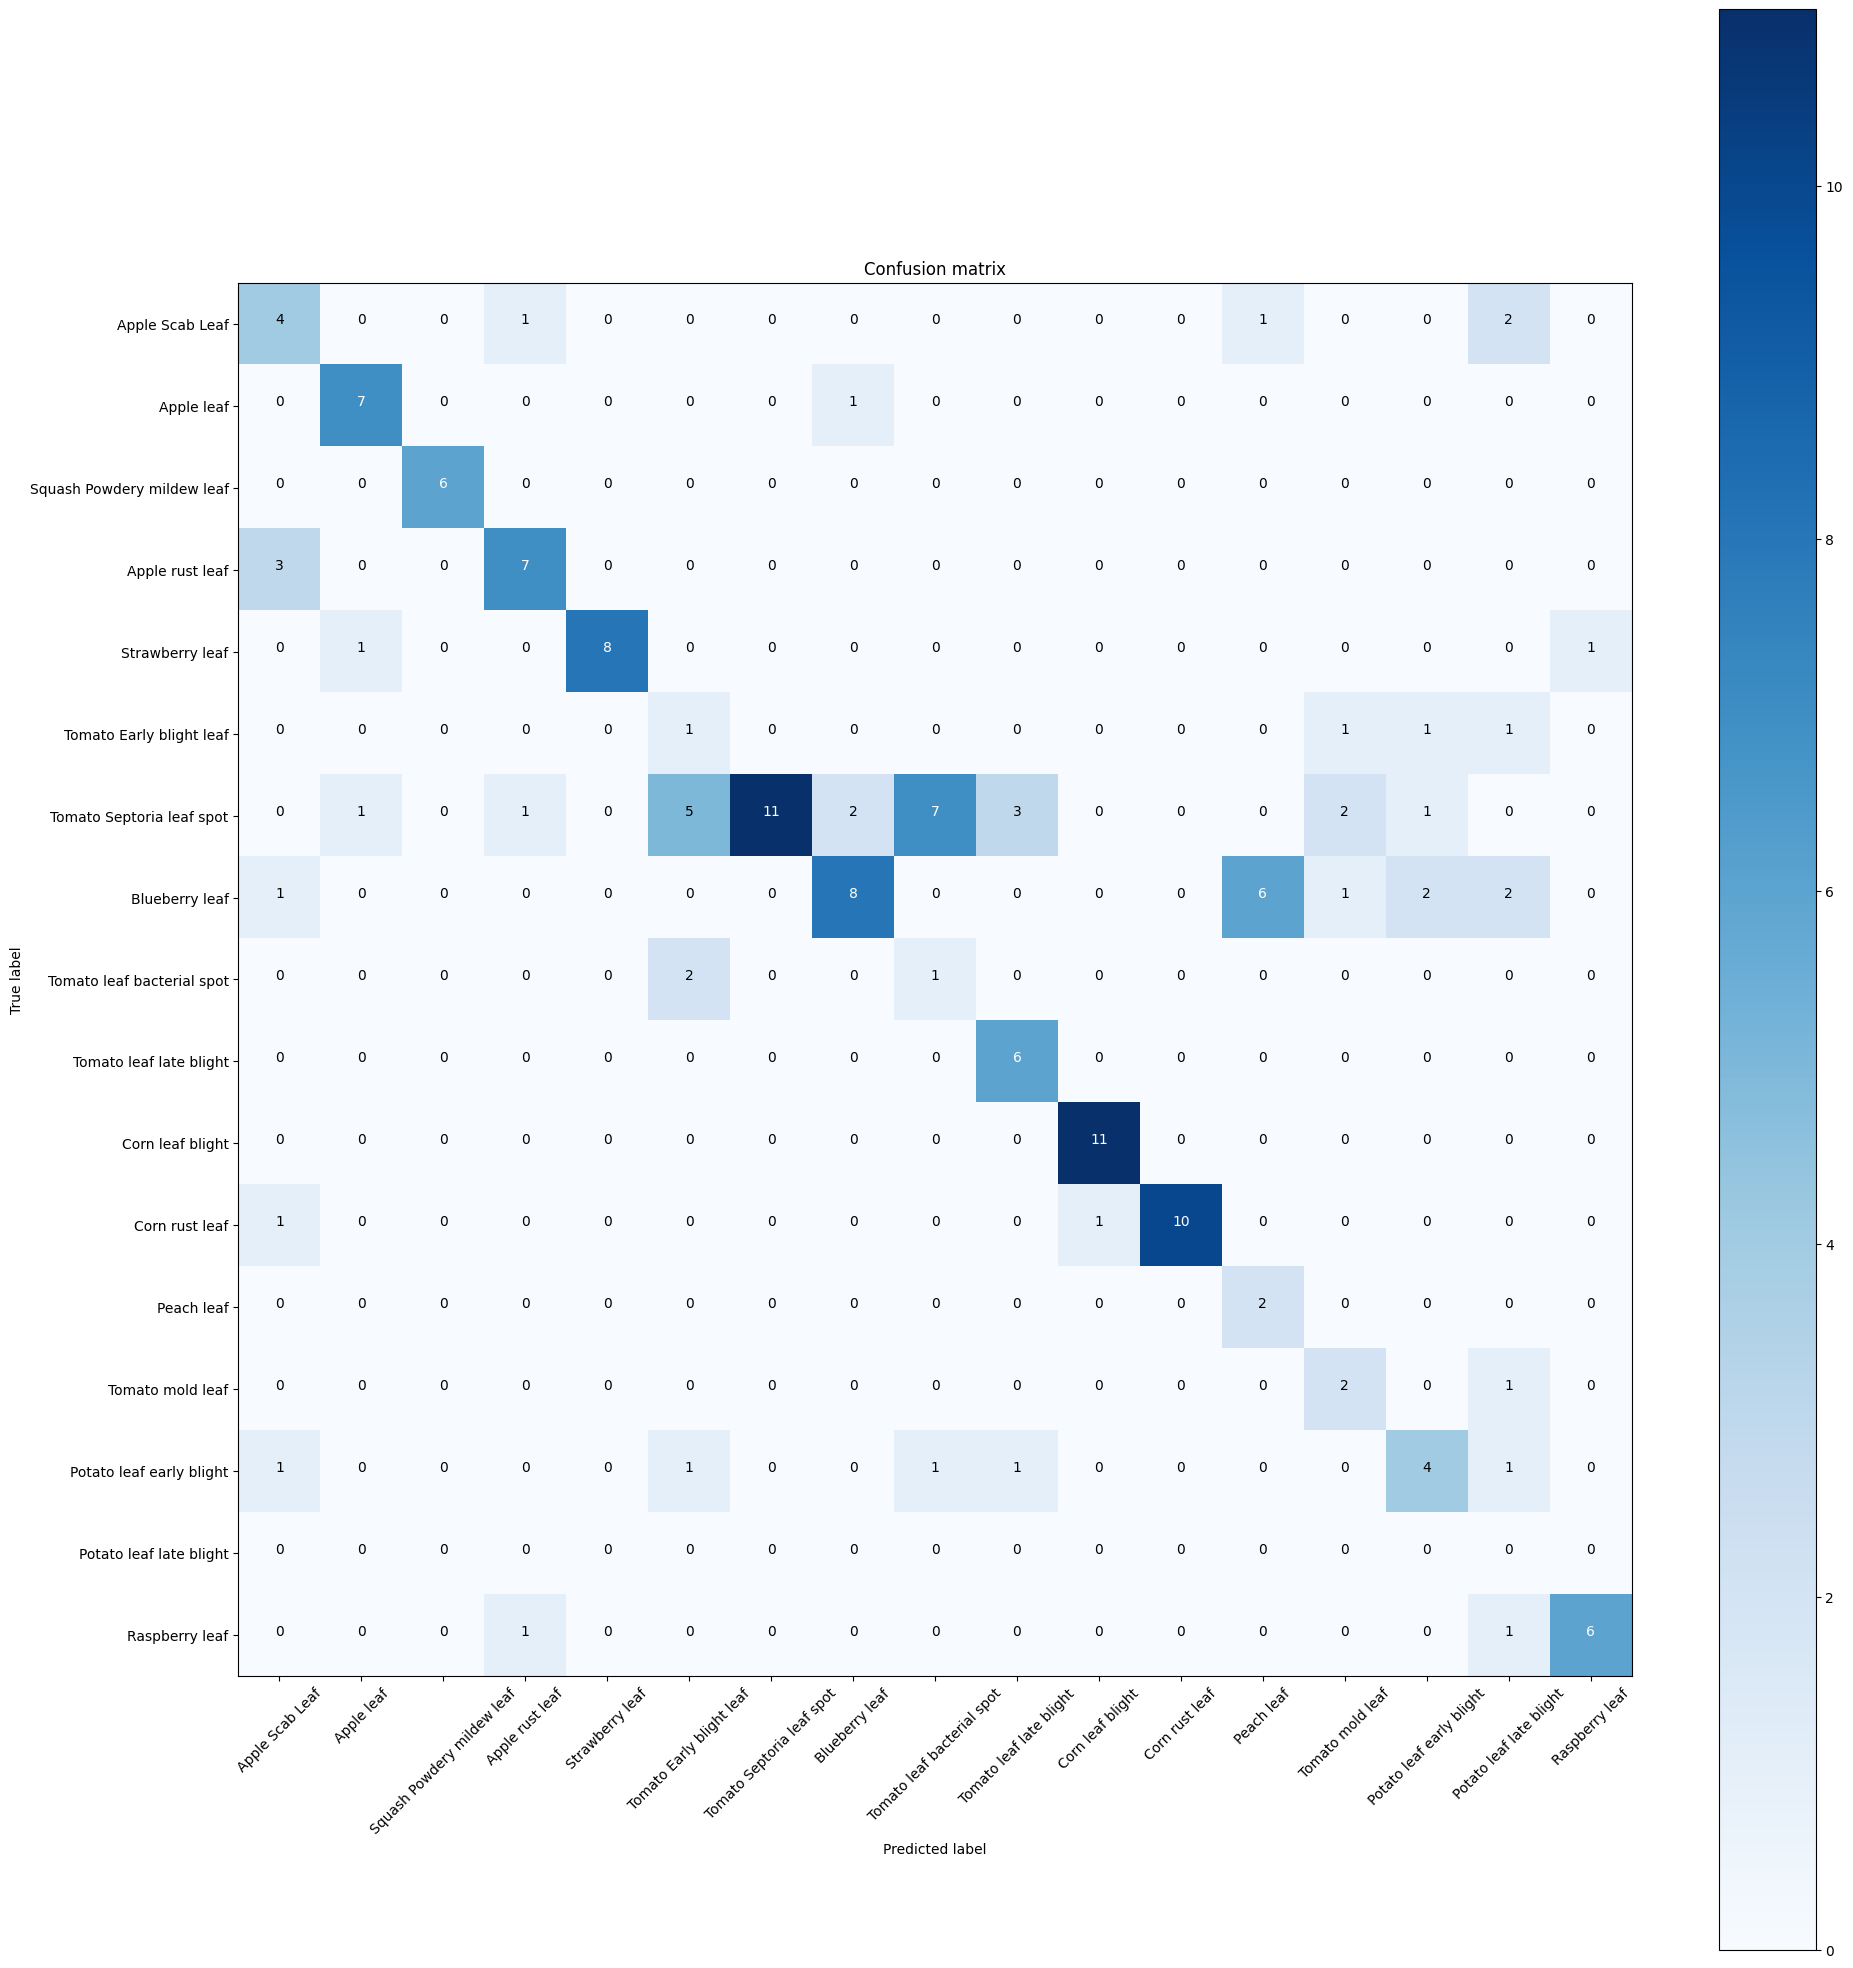

None


In [26]:
print('Confusion Matrix')
print(plot_confusion_matrix(confusion_matrix(y_pred, test_labels),labels_names))

In [27]:
print('Classification Report')
print(classification_report(y_pred, test_labels))

Classification Report
              precision    recall  f1-score   support

           0       0.40      0.50      0.44         8
           1       0.78      0.88      0.82         8
           2       1.00      1.00      1.00         6
           3       0.70      0.70      0.70        10
           4       1.00      0.80      0.89        10
           5       0.11      0.25      0.15         4
           6       1.00      0.33      0.50        33
           7       0.73      0.40      0.52        20
           8       0.11      0.33      0.17         3
           9       0.60      1.00      0.75         6
          10       0.92      1.00      0.96        11
          11       1.00      0.83      0.91        12
          12       0.22      1.00      0.36         2
          13       0.33      0.67      0.44         3
          14       0.50      0.44      0.47         9
          15       0.00      0.00      0.00         0
          16       0.86      0.75      0.80         8

    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Custom CNN Model

In [4]:
# Adding google drive to colab/
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import numpy as np

In [3]:
# Using saved numpy data for faster training
X_train = np.load('/content/gdrive/MyDrive/PlantDoc/dataset/Images_train.npy')
y_train = np.load('/content/gdrive/MyDrive/PlantDoc/dataset/Labels_train.npy')

In [4]:
# Using saved numpy data for faster validation
X_val = np.load('/content/gdrive/MyDrive/PlantDoc/dataset/Images_val.npy')
y_val = np.load('/content/gdrive/MyDrive/PlantDoc/dataset/Labels_val.npy')

In [5]:
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from keras.layers import Activation, Dense
from keras.models import Sequential
from keras.layers import Dropout, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model

In [6]:
labels_names = ['Apple Scab Leaf', 'Apple leaf', 'Squash Powdery mildew leaf', 'Apple rust leaf', 'Strawberry leaf', 'Tomato Early blight leaf', 'Tomato Septoria leaf spot', 'Blueberry leaf', 'Tomato leaf bacterial spot', 'Tomato leaf late blight', 'Corn leaf blight', 'Corn rust leaf', 'Peach leaf', 'Tomato mold leaf', 'Potato leaf early blight', 'Potato leaf late blight', 'Raspberry leaf']

In [7]:
input_shape = (416,416,3)
epoch = 25
batch_size = 8
no_classes = len(labels_names)

In [8]:
# Defination of model
model = Sequential()
model.add(Conv2D(416, kernel_size = (3,3), activation = 'relu', input_shape = input_shape, padding = 'same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization(axis=3)) #add batch normalization
model.add(Conv2D(256, (3,3), activation = 'relu', padding = 'same')) # Convolution layer
model.add(Conv2D(256, (3,3), activation = 'relu', padding = 'same'))
model.add(BatchNormalization(axis=3)) #add batch normalization
model.add(MaxPooling2D(pool_size=(2,2))) # Max Pooling layer
model.add(Conv2D(128, (3,3), activation = 'relu', padding = 'same'))
model.add(Conv2D(128, (3,3), activation = 'relu', padding = 'same'))
model.add(BatchNormalization(axis=3)) #add batch normalization
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3,3), activation = 'relu', padding = 'same'))
model.add(Conv2D(64, (3,3), activation = 'relu', padding = 'same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32, (3,3), activation = 'relu', padding = 'same'))
model.add(Conv2D(32, (3,3), activation = 'relu', padding = 'same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization(axis=3)) #add batch normalization
model.add(Conv2D(16, (3,3), activation = 'relu', padding = 'same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten()) # Fully connected layer
model.add(Dense(no_classes, activation = 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 416, 416, 416)     11648     
                                                                 
 max_pooling2d (MaxPooling2  (None, 208, 208, 416)     0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 208, 208, 416)     1664      
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 208, 208, 512)     1917440   
                                                                 
 conv2d_2 (Conv2D)           (None, 208, 208, 512)     2359808   
                                                                 
 conv2d_3 (Conv2D)           (None, 208, 208, 512)     2

In [9]:
# Create an ImageDataGenerator instance with augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=20,      # Random rotation up to 20 degrees
    width_shift_range=0.2,  # Random horizontal shift
    height_shift_range=0.2, # Random vertical shift
    shear_range=0.2,        # Shear transformation
    zoom_range=0.2,         # Random zoom
    horizontal_flip=True,   # Random horizontal flip
    fill_mode='nearest'     # Fill mode for points outside the input boundaries
)

In [10]:
from tensorflow.keras.callbacks import ModelCheckpoint
# Define a ModelCheckpoint callback
checkpoint_path = "/content/gdrive/MyDrive/PlantDoc/dataset/RA_CNN_Custom_25/model_checkpoint_epoch_{epoch:02d}.h5"  # Include the epoch number in the filename
checkpoint_callback = ModelCheckpoint(
    checkpoint_path,
    save_best_only=True,  # Only best model is saved
    verbose=1
)


In [11]:
opt = Adam(1e-4)
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=["accuracy"],
              loss_weights=1.0,
              run_eagerly=True)

In [12]:
# Displaying dataset size
print(X_train.shape, X_val.shape)
print(y_train.shape, y_val.shape)

(1547, 416, 416, 3) (222, 416, 416, 3)
(1547,) (222,)


In [13]:
# Fitting the model with the dataset
model.fit(datagen.flow(X_train, y_train, batch_size = batch_size),
          batch_size=batch_size,
          epochs = epoch,
          validation_data=(X_val,y_val),
          callbacks=[checkpoint_callback])

Epoch 1/20


194/194 [==============================] - ETA: 0s - loss: 3.0269 - accuracy: 0.0821
Epoch 1: val_loss improved from inf to 2.89361, saving model to /content/gdrive/MyDrive/PlantDoc/dataset/RA_CNN_Custom_25/model_checkpoint_epoch_01.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


194/194 [==============================] - 706s 3s/step - loss: 3.0269 - accuracy: 0.0821 - val_loss: 2.8936 - val_accuracy: 0.0631
Epoch 2/20
194/194 [==============================] - ETA: 0s - loss: 2.8470 - accuracy: 0.0950
Epoch 2: val_loss improved from 2.89361 to 2.85590, saving model to /content/gdrive/MyDrive/PlantDoc/dataset/RA_CNN_Custom_25/model_checkpoint_epoch_02.h5
194/194 [==============================] - 628s 3s/step - loss: 2.8470 - accuracy: 0.0950 - val_loss: 2.8559 - val_accuracy: 0.0856
Epoch 3/20
194/194 [==============================] - ETA: 0s - loss: 2.8005 - accuracy: 0.1105
Epoch 3: val_loss improved from 2.85590 to 2.81035, saving model to /content/gdrive/MyDrive/PlantDoc/dataset/RA_CNN_Custom_25/model_checkpoint_epoch_03.h5
194/194 [==============================] - 628s 3s/step - loss: 2.8005 - accuracy: 0.1105 - val_loss: 2.8103 - val_accuracy: 0.1081
Epoch 4/20
194/194 [==============================] - ETA: 0s - loss: 2.7790 - accuracy: 0.1099
Epoch 

In [14]:
# Saving the model for future use
!mkdir -p saved_model
model.save('/content/gdrive/MyDrive/PlantDoc/dataset/RA_CNN_Custom_25')

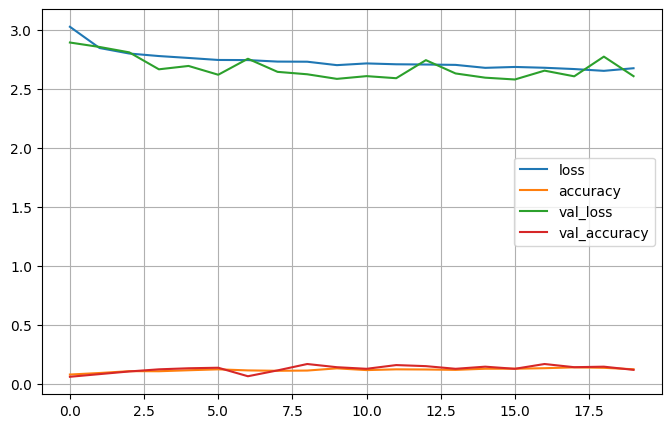

In [15]:
# History graph of the model trained
import matplotlib.pyplot as plt
import pandas as pd
pd.DataFrame(model.history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.show()

In [4]:
import tensorflow as tf
trained_model = tf.keras.models.load_model('/content/gdrive/MyDrive/PlantDoc/dataset/RA_CNN_Custom_25')
trained_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 416, 416, 416)     11648     
                                                                 
 max_pooling2d (MaxPooling2  (None, 208, 208, 416)     0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 208, 208, 416)     1664      
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 208, 208, 512)     1917440   
                                                                 
 conv2d_2 (Conv2D)           (None, 208, 208, 512)     2359808   
                                                                 
 conv2d_3 (Conv2D)           (None, 208, 208, 512)     2

In [5]:
import numpy as np
# Using saved numpy data for faster training
test_images = np.load('/content/gdrive/MyDrive/PlantDoc/dataset_numpy_norm_less/Images_test.npy')
test_labels = np.load('/content/gdrive/MyDrive/PlantDoc/dataset_numpy_norm_less/Labels_test.npy')

In [6]:
# Validating accuracy for test data
loss, acc = trained_model.evaluate(test_images,test_labels, verbose = 1)
print('Accuracy: %.3f'%acc)

5/5 [==============================] - 85s 10s/step - loss: 2.7420 - accuracy: 0.1111
Accuracy: 0.111


In [7]:
# Classification report and Confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
y_proba = trained_model.predict(test_images)
y_pred = np.argmax(y_proba, axis = 1)

5/5 [==============================] - 8s 2s/step


Confusion Matrix


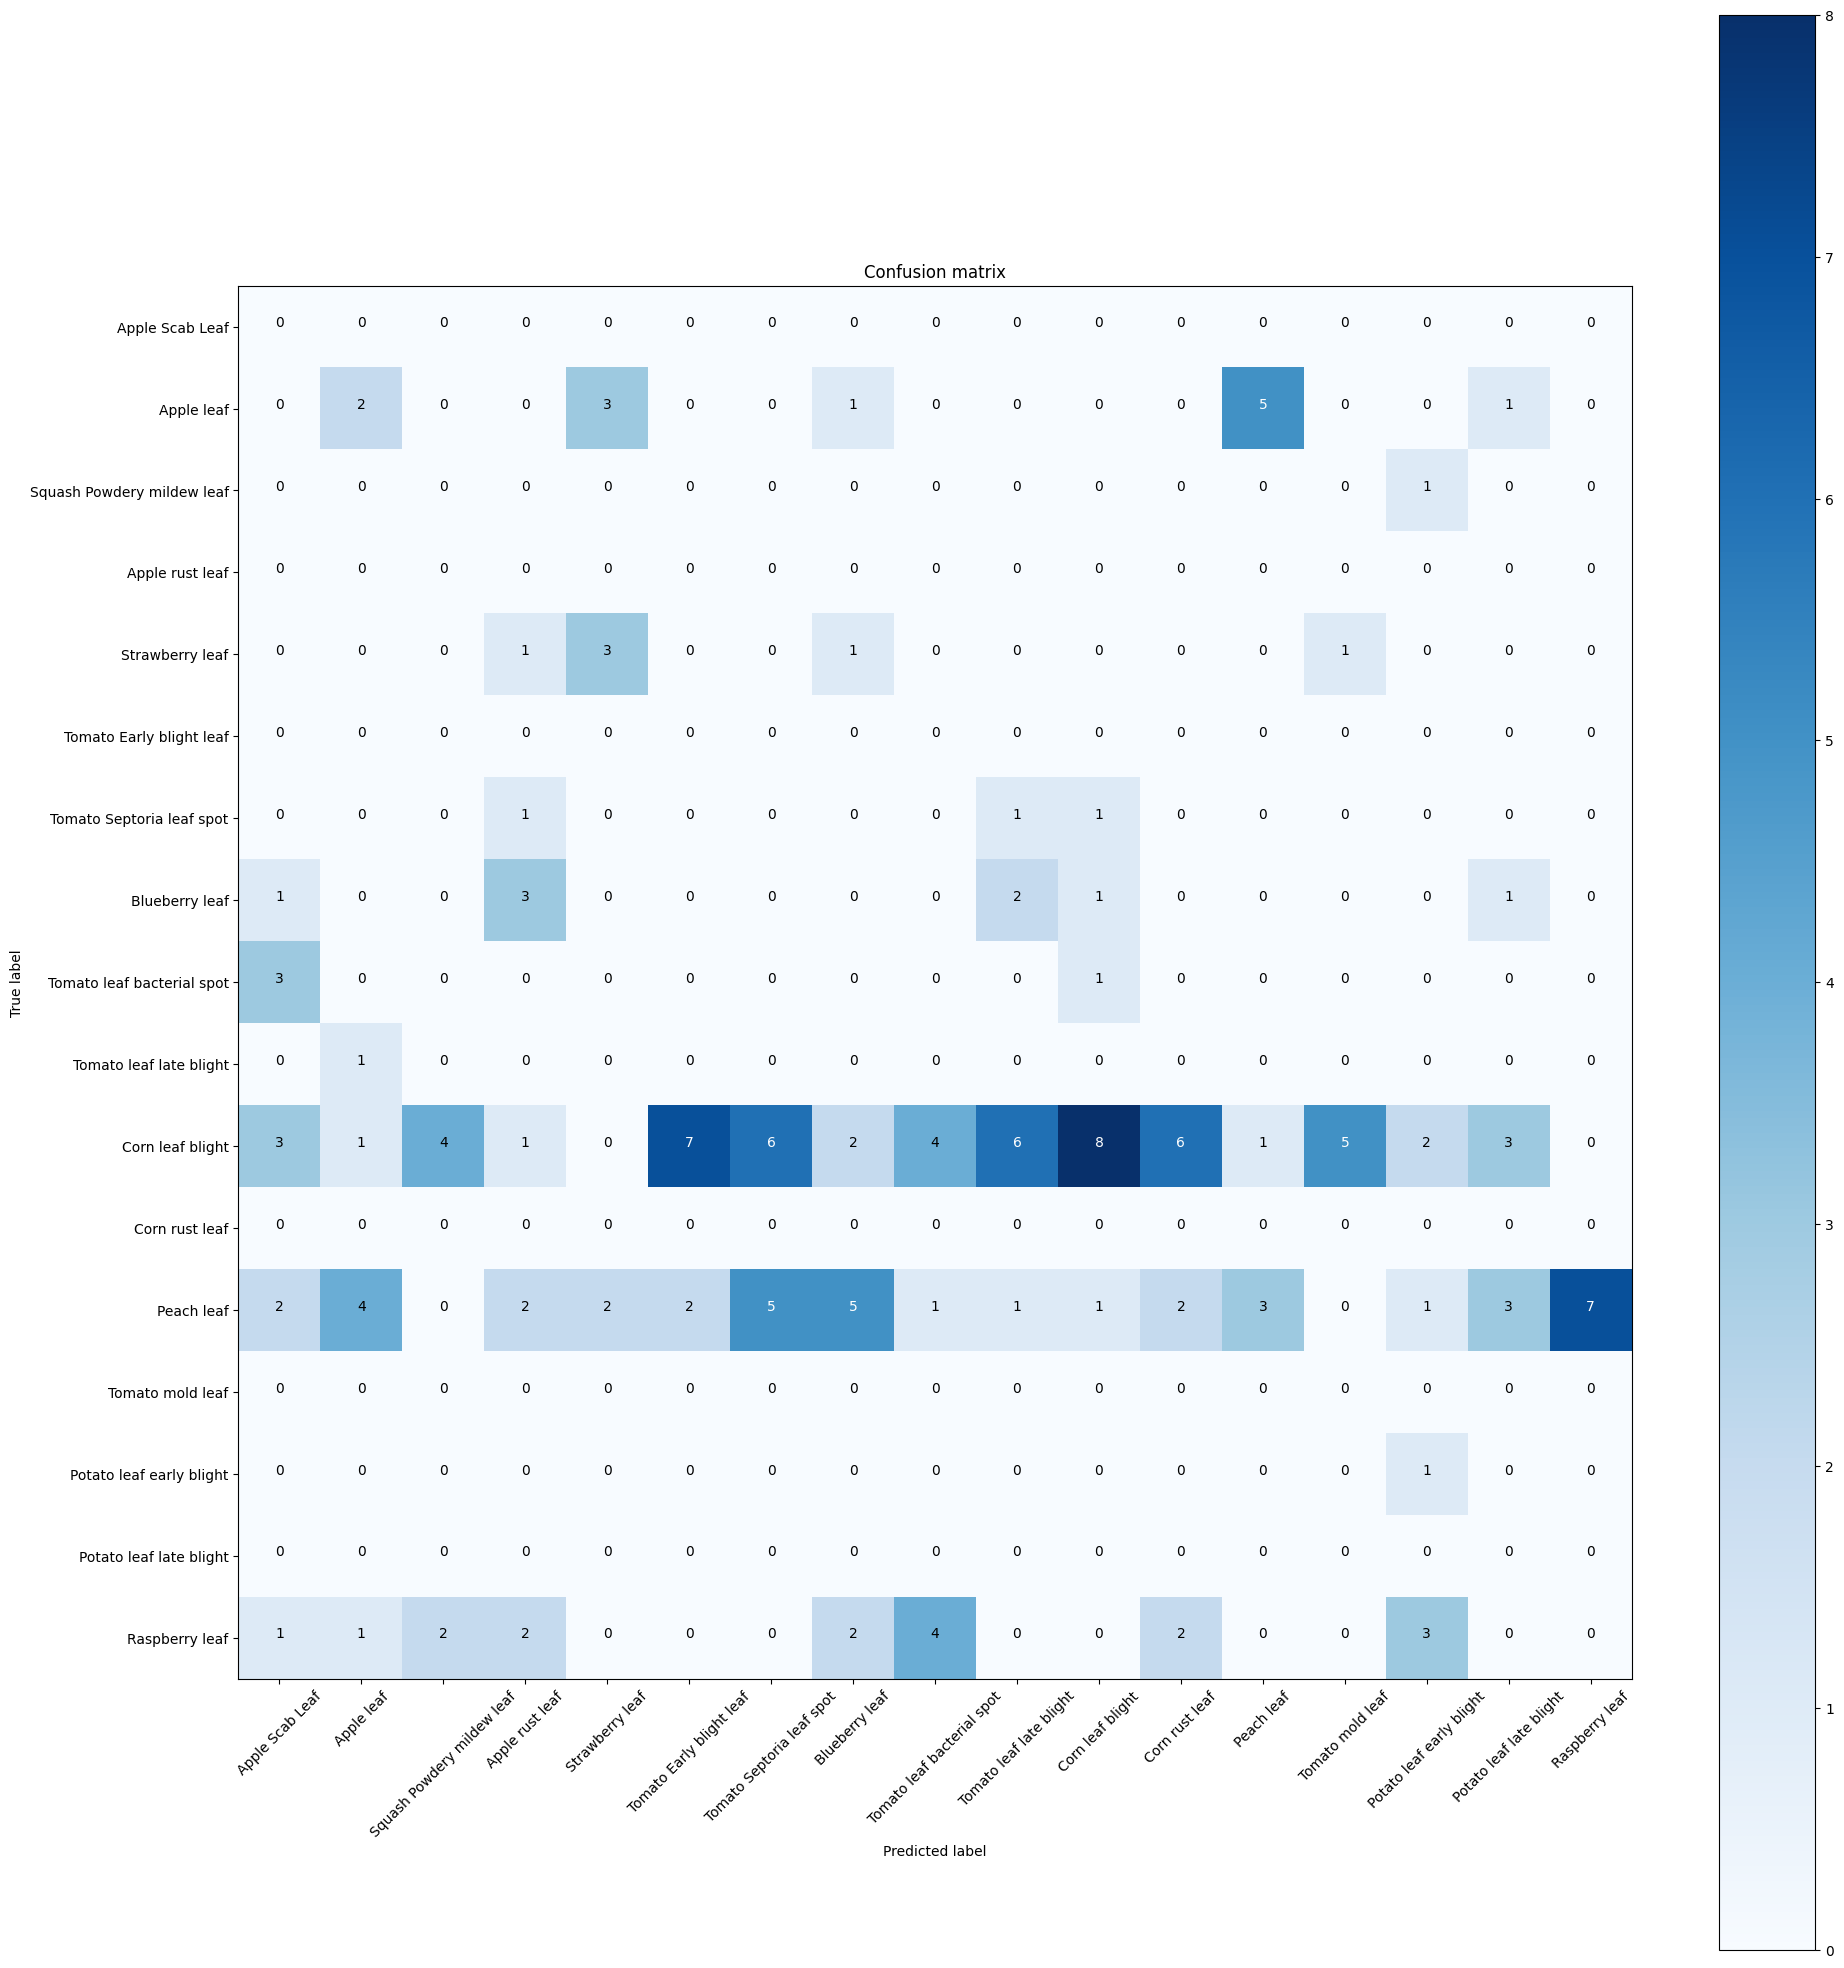

None


In [8]:
print('Confusion Matrix')
print(plot_confusion_matrix(confusion_matrix(y_pred, test_labels),labels_names))

In [9]:
print('Classification Report')
print(classification_report(y_pred, test_labels))

Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.22      0.17      0.19        12
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         0
           4       0.38      0.50      0.43         6
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         3
           7       0.00      0.00      0.00         8
           8       0.00      0.00      0.00         4
           9       0.00      0.00      0.00         1
          10       0.67      0.14      0.23        59
          11       0.00      0.00      0.00         0
          12       0.33      0.07      0.12        41
          13       0.00      0.00      0.00         0
          14       0.12      1.00      0.22         1
          15       0.00      0.00      0.00         0
          16       0.00      0.00      0.00        17

    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
